# 파이토치(pytorch)

- 2017년도 페이스북이 공개
- GPU(병렬 처리가 가능!)를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴

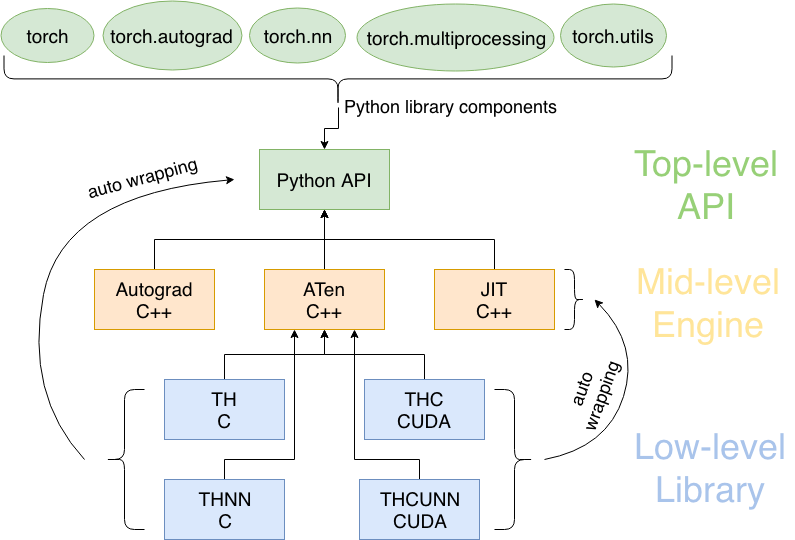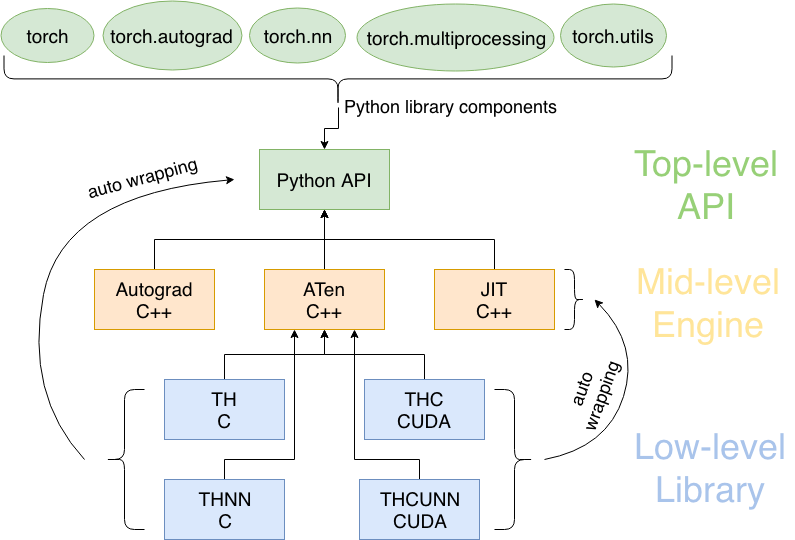

- low-level : C, Cuda 와 같이 빠른 하드웨어 적 접근이 가능한 저수준 언어로 구성 
- mid-level : C++ 가 엔진레벨로 구성 
- Top-level : 이 모두를 python api로 wrapping되어 모듈화함. 
    - torch, torch.autograd, torch.nn, 등과 같은 모듈 등이 python 내에서 돌아가도록 구성 

# 파이토치의 구성요소 

- torch : 메인 네임스페이스. 텐서 등의 다양한 수학 함수 포함
- torch.autograd : 자동 미분 기능
- torch.nn : neural network 즉 신경망 구축을 위한 데이터 구조, 레이어 라이브러리
- torch.multiprocessing : 병렬처리 기능
- torch.optim : SGD 를 중심으로 한 최적화 알고리즘 제공
- torch.utils : 데이터조작 등 유틸리티 기능 제공
- torch.onnx : 다른 프레임워크 간에 모델을 공유할 때 사용 

# 텐서(Tensors) ?

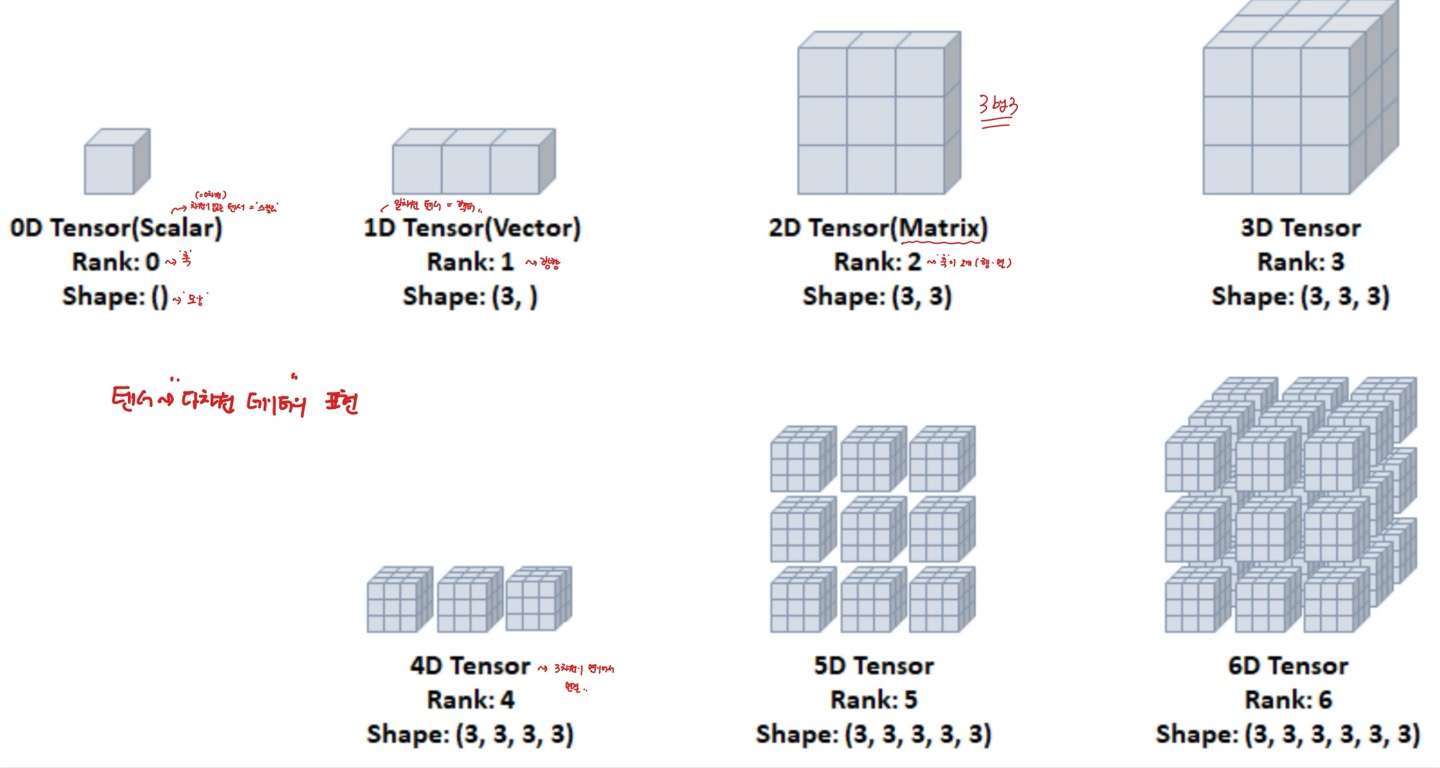
- 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용한다
- 다차원에 대한 데이터 표현 방법을 의미
- numpy의 ndarray(다차원 행렬)와 유사하다
    - 차이점 ? 
- GPU를 사용해서 연산을 가속한다 ! (In pytorch)

In [2]:
import torch
torch.__version__    #cuda (x) 

'2.7.0+cpu'

- cuda는 왜 필요한가 ?
    - cuda가 없어도 파이토치 사용은 가능하지만, cpu만 사용하기 때문에 병렬 연산이 어려워 작업 속도가 늘어난다.
    - cpu에는 '코어'라는 것이 한 개 이상 존재한다. 이때 코어는 여러가지 일을 동시에 처리하는 것이다.
    - 딥러닝 태스크에는 여러 레이어의 신경망들이 다양한 연산을 수행한다.
        - 1) 순전파 과정에서 엄청난 크기의 행렬-행렬 간의 곱셈 연산을 수행한다
        - 2) SGD 최적화 과정 중 하나로, mini-batch를 나누고 각 mini batch의 역전파 과정에서 loss에 대한 gradient를 계산함
        - 연산할 양이 엄청나고 코어가 많이 필요함을 의미
    - NVDIA에서 GPU에 CUDA Core라는 작은 연산 유닛을 만들어 병렬처리가 가능하게 만들었다. 즉 복잡한 계산을 빠른 속도로 해낸다
    - 이는 cpu를 사용했을 때 소모되는 전력량보다 훨씬 더 적은 전력을 요구한다. 

# 텐서 초기화와 데이터 타입

### 초기화되지 않은 텐서 -> empty를 사용하면 랜덤하게 텐서의 값들이 들어간다 

In [3]:
#torch.empty -> 쓰레기 값을 갖는 텐서

x = torch.empty(4,2)  #4by2 짜리 텐서 
print(x)

tensor([[-1.3015e-18,  7.4269e-43],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]])


### 무작위로 초기화된 텐서 

In [4]:
x = torch.rand(4,2) #랜덤을 기준으로 텐서가 채워짐 
print(x)

tensor([[0.3206, 0.0225],
        [0.9975, 0.5639],
        [0.0305, 0.2966],
        [0.5331, 0.2375]])


### 데이터타입이 long이고, 0으로 채워진 텐서 

In [5]:
# torch.zeros(size, full value, ...) : full_value 값을 갖는 텐

x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


### 사용자가 입력한 값으로 텐서 초기화 

In [8]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


### 2x4 크기, double 타입, 1로 채워진 텐서

In [10]:
x = x.new_ones(2,4,dtype=torch.double) #아무튼 자유자재로 이렇게 텐서들을 만들 수 있다.
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


### x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [12]:
x = torch.randn_like(x, dtype=torch.float)  #like(x)랑 형태는 같지만(2x4), dtype은 float인걸로 만들기 
print(x)

tensor([[ 2.1306, -0.2616, -0.5413,  1.0768],
        [ 0.6229,  1.1018, -1.7881, -0.0573]])


In [13]:
#입력텐서와 동일한 모양의 텐서를 만들 되, 쓰레기 값으로 채우기 

torch.empty_like(x)

tensor([[-1.3017e-18,  7.4269e-43,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

### 텐서의 크기 계산 ?

In [14]:
print(x.size())

torch.Size([2, 4])


# 데이터 타입

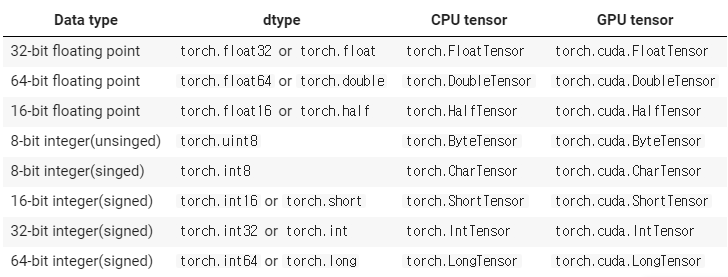

In [16]:
ft = torch.FloatTensor([1,2,3])  #. 이 붙은 float 형(소수점) 
print(ft)
print(ft.dtype)  #float 텐서의 기본은 32비트

tensor([1., 2., 3.])
torch.float32


In [17]:
#type casting, 즉 타입을 변경해주는 ㅇㅇ 
print(ft.short()) 
print(ft.int()) 
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [20]:
it = torch.IntTensor([1,2,3])   #i 대문자 주의 

print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [22]:
#it 텐서 type casting
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


#CUDA tensor 
- .to 메소드를 사용하여 텐서 값 자체를 어떠한 장치(cpu, gpu)로도 옮길 수 있음 

In [23]:
x = torch.randn(1)

print(x)
print(x.item())  #텐서의 '실제 값' 
print(x.dtype)

tensor([0.7303])
0.7303206324577332
torch.float32


In [27]:
#위의 텐서를 옮겨보자 

#아래와 같이 함수를 작성하면 , 부득이하게 gpu가 안될땐 cpu로 작동이 된다 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #즉, cuda가 사용가능하면 cuda로 테스트, 아니면 cpu로 
#사실 이렇게 그냥 cpu를 넣으면 cpu로, gpu를 넣으면 gpu로 작동한다 -> torch.device('cpu') 
print(device) 

y = torch.ones_like(x, device = device)  #값은 1인 텐서 
print(y) 

x = x.to(device)  #위에 선언했던 x 텐서를 device 즉, cuda(또는cpu)로 보내기 

z = x + y
print(z)
print(z.to('cpu', torch.double))  #옮길때의 타입도 지정할 수 있음 

cpu
tensor([1.])
tensor([1.7303])
tensor([1.7303], dtype=torch.float64)


# 다차원 텐서 표현

### 0D TENSOR(SCALAR) 

In [28]:
t0 = torch.tensor(0) 
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D TENSOR(VECTOR)

In [30]:
#하나의 축이 존재하니까 리스트 형식으로 
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D TENSOR(MATRIX)
- 행렬과 같은 모양으로 두 개의 축 존재
- 일반적으로 수치, 통계 데이터셋이 해당
- 주로 샘플과 특성을 가진 구조로 사용 (sample, features)
- 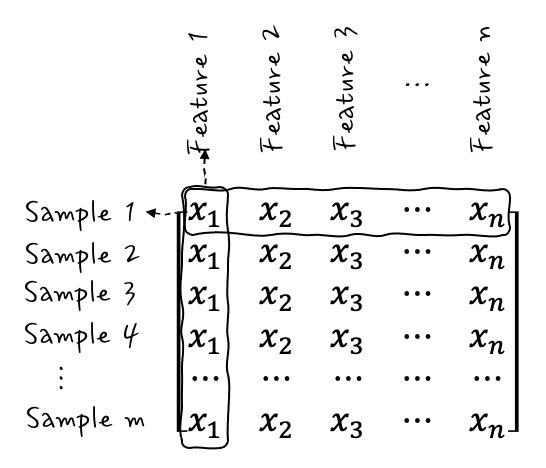

In [32]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])   #3by3  , 2차원 
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D TENSOR
- 큐브 형태 (축이 세개)
- 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당함
- 주식 가격 데이터셋, 시간에 따른 질병 발생 데이터 등이 존재
- 주로 샘플, 타임스텝(Time steps), 특성 을 가진 구조로 사용한다.
- 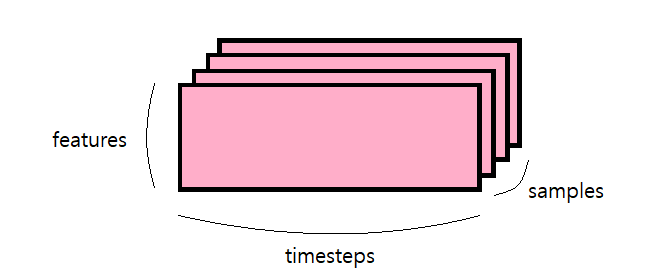

In [33]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])  
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


### 4D TENSOR 
- 컬러 이미지 !! (흑백 이미지는 3D 텐서로 가능)
- 주로 샘플, 높이, 너비, 컬러 채널(RGB) 을 가진 구조로 사용 (흑백이미지는 채널 정보가 빠짐)
- 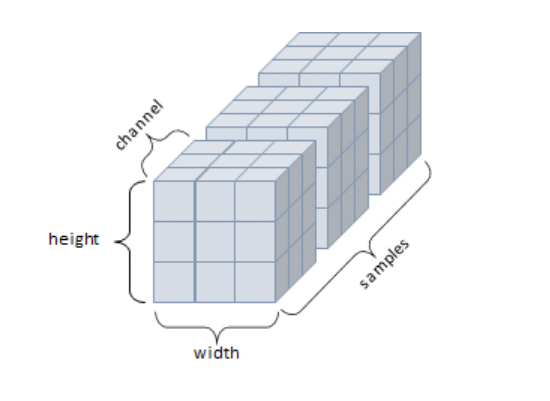

### 5D TENSOR
- 비디오 데이터가 대표적 사례
- 주로 샘플, '프레임', 높이, 너비, 컬러 채널 구조로 사용

# 텐서의 연산(OPERATIONS)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [42]:
import math #웬만한 수학 연산들은 모두 텐서에 적용 가능

#1by2로 텐서 생성 
a = torch.randn(1,2) * 2 - 1 

print(a)
print(torch.abs(a)) #절대값
print(torch.ceil(a))  
print(torch.floor(a)) 
print(torch.clamp(a, -0.5, 0.5))  #-0.5~0.5 사이(min, max 사이)에 값이 존재하도록 조정  

tensor([[-0.3839,  0.0232]])
tensor([[0.3839, 0.0232]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.3839,  0.0232]])


In [44]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))  #유니크한 값만 반환

tensor([[-0.3839,  0.0232]])
tensor(-0.3839)
tensor(0.0232)
tensor(-0.1803)
tensor(0.2878)
tensor(-0.0089)
tensor([1, 2, 3])


### max와 min 은 dim 인자를 줄 수 있다 
- dim 인자를 줄 경우 argmax 와 argmin 도 리턴
    - argmax : 최대값을 가진 인덱스
    - argmin : 최소값을 가진 인덱스

In [46]:
x = torch.rand(2,2) #x 는 2by2 짜리 텐서임 
print(x)
print(x.max(dim=0)) #dim 인자를 설정
print(x.max(dim=1)) 

#max(dim=0) 은 세로 방향에서 각 열마다 세로 방향에서의 최댓값을 찾는거임 -> 각각 1번째 인덱스가 최대값 ㅇㅇ 

tensor([[0.5604, 0.5634],
        [0.1095, 0.9777]])
torch.return_types.max(
values=tensor([0.5604, 0.9777]),
indices=tensor([0, 1]))
torch.return_types.max(
values=tensor([0.5634, 0.9777]),
indices=tensor([1, 1]))


### torch.add : 덧셈

In [49]:
#사실 x+y 해도 된다 . 
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
print(torch.add(x,y)) #메소드를 통해서 더하기도 가능하다 ㅇㅇ 
print(x+y)

tensor([[0.6906, 0.1013],
        [0.2282, 0.2056]])
tensor([[0.2037, 0.5463],
        [0.8240, 0.8060]])
tensor([[0.8943, 0.6476],
        [1.0522, 1.0117]])
tensor([[0.8943, 0.6476],
        [1.0522, 1.0117]])


### 결과 텐서를 인자로 제공

In [50]:
result = torch.empty(2,4) 

torch.add(x,y, out = result) #x,y 더한 값을 result에 넣어줘 
print(result)

tensor([[0.8943, 0.6476],
        [1.0522, 1.0117]])


C:\Users\82109\AppData\Local\Temp\ipykernel_36384\4069203718.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Resize.cpp:37.)
  torch.add(x,y, out = result) #x,y 더한 값을 result에 넣어줘


### in-place 방식 
- 연산 결과를 기존 텐서의 값으로 새롭게 업데이트하는 방식
- in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 '_' 가 붙는다
- x.copy_(y), x.t_()

In [51]:
print(x)
print(y)
y.add_(x)  #y의 값을 x를 y에 더한 값으로 치환
print(y)

tensor([[0.6906, 0.1013],
        [0.2282, 0.2056]])
tensor([[0.2037, 0.5463],
        [0.8240, 0.8060]])
tensor([[0.8943, 0.6476],
        [1.0522, 1.0117]])


### torch.div : 나눗셈
### torch.mul : 곱셈
### torch.mm : 내적(dot product) 

In [53]:
print(x)
print(y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z)) #얘는 반대로 분해 (U, S, V 로 행렬 분리)

tensor([[0.6906, 0.1013],
        [0.2282, 0.2056]])
tensor([[0.8943, 0.6476],
        [1.0522, 1.0117]])
tensor([[0.7242, 0.5497],
        [0.4204, 0.3558]])
tensor([[0.7242, 0.5497],
        [0.4204, 0.3558]])
torch.return_types.svd(
U=tensor([[-0.8555, -0.5179],
        [-0.5179,  0.8555]]),
S=tensor([1.0627, 0.0250]),
V=tensor([[-0.7878, -0.6159],
        [-0.6159,  0.7878]]))


# 텐서의 조작(MANIPULATIONS)

### 인덱싱 : NUMPY 처럼 인덱싱 형태로 사용 -> 특정 위치값 가져오기 ㅇㅇ

In [54]:
x = torch.Tensor([[1,2],   #1 = 0 위치, 2 = 1치치
                  [3,4]])

print(x)
print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

#슬라이싱
print(x[:,0]) #행은 슬라이싱으로 모두 다 선택 -> 1, 3 / 열은 0번째만 선택 
print(x[:,1])

print(x[0,:])
print(x[1,:])



tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


### view : 텐서의 크기(size), 모양(shape) 를 변경
- 기본적으로 변경 전과 후의 텐서 안의 원소 개수가 유지되어야 함
- -1 로 설정되면 계산을 통해 해당 크기값을 유추

In [55]:
x = torch.randn(4,5) #4 by 5
print(x)
y = x.view(20)   
print(y)   
z= x.view(5,-1)
print(z) 

tensor([[-0.0048,  0.2661, -0.8484, -1.6476,  0.2456],
        [-0.2018,  0.3688, -2.2586, -0.0597,  2.1314],
        [ 0.5843,  0.3276, -1.3233, -0.3915,  0.7847],
        [ 0.0089, -0.2347,  1.7590,  1.7222, -0.9461]])
tensor([-0.0048,  0.2661, -0.8484, -1.6476,  0.2456, -0.2018,  0.3688, -2.2586,
        -0.0597,  2.1314,  0.5843,  0.3276, -1.3233, -0.3915,  0.7847,  0.0089,
        -0.2347,  1.7590,  1.7222, -0.9461])
tensor([[-0.0048,  0.2661, -0.8484, -1.6476],
        [ 0.2456, -0.2018,  0.3688, -2.2586],
        [-0.0597,  2.1314,  0.5843,  0.3276],
        [-1.3233, -0.3915,  0.7847,  0.0089],
        [-0.2347,  1.7590,  1.7222, -0.9461]])


### item : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음
- 단, '스칼라'값 하나만 존재해야 item 사용 가능

In [56]:
#즉, 텐서에 값을 하나 가져옴 

x = torch.randn(1)  #하나의 값만 넣기
print(x)
print(x.item())
print(x.dtype)

tensor([0.4271])
0.4270729720592499
torch.float32


### squeeze : 차원을 축소(제거) 

In [57]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.0382, 0.9642, 0.3488],
         [0.4439, 0.1200, 0.5523],
         [0.1991, 0.2486, 0.9348]]])
torch.Size([1, 3, 3])


In [58]:
t = tensor.squeeze()
print(t)
print(t.shape) #3by3으로 앞의 차원이 제거됨 

tensor([[0.0382, 0.9642, 0.3488],
        [0.4439, 0.1200, 0.5523],
        [0.1991, 0.2486, 0.9348]])
torch.Size([3, 3])


### unsqueeze : 차원을 증가(생산)

In [59]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor = t.unsqueeze(dim=0)   #dimension을 첫번째 차원 기준으로 늘리기
print(tensor)
print(tensor.shape)

tensor([[0.3999, 0.0848, 0.6779],
        [0.1833, 0.2926, 0.9288],
        [0.9080, 0.6271, 0.3862]])
torch.Size([3, 3])
tensor([[[0.3999, 0.0848, 0.6779],
         [0.1833, 0.2926, 0.9288],
         [0.9080, 0.6271, 0.3862]]])
torch.Size([1, 3, 3])


In [61]:
tensor = t.unsqueeze(dim=2) 
print(tensor)
print(tensor.shape)  #dim = 2 이니까, 3by3by'1' 이 된다

tensor([[[0.3999],
         [0.0848],
         [0.6779]],

        [[0.1833],
         [0.2926],
         [0.9288]],

        [[0.9080],
         [0.6271],
         [0.3862]]])
torch.Size([3, 3, 1])


### stack : 텐서 간 결합 

In [64]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat : 텐서를 concatenate , 결합함
- stack 과 유사하지만, 쌓을 dim이 존재해야 함
- 해당 차원을 늘려준 '후' 결합

In [65]:
a= torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c= torch.cat((a,b), dim=0)
print(c)
print(c.size())  #1,3,3을 두개 합치니 2,3,3 이 되버림 (앞에서 dim=0으로 설정해서 ㅇㅇ ) 

tensor([[[ 0.5579, -0.5528,  1.0668],
         [-0.8203, -0.6803, -1.1651],
         [-0.0876, -0.4591,  1.3590]]])
tensor([[[ 0.1264,  2.1890,  0.1472],
         [-0.8282, -1.2814, -1.2162],
         [-1.8755,  1.7695, -0.5026]]])
tensor([[[ 0.5579, -0.5528,  1.0668],
         [-0.8203, -0.6803, -1.1651],
         [-0.0876, -0.4591,  1.3590]],

        [[ 0.1264,  2.1890,  0.1472],
         [-0.8282, -1.2814, -1.2162],
         [-1.8755,  1.7695, -0.5026]]])
torch.Size([2, 3, 3])


In [66]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[ 0.5579, -0.5528,  1.0668],
         [-0.8203, -0.6803, -1.1651],
         [-0.0876, -0.4591,  1.3590],
         [ 0.1264,  2.1890,  0.1472],
         [-0.8282, -1.2814, -1.2162],
         [-1.8755,  1.7695, -0.5026]]])
torch.Size([1, 6, 3])


### chunk : 텐서를 여러 개로 나눌 때 사용(몇개로 나눌것인지??) 

In [67]:
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1) #두번째 차원 기준으로 나눠줘
print(t1)
print(t2)
print(t3)

tensor([[0.3146, 0.3040, 0.6964, 0.5885, 0.6832, 0.9872],
        [0.0252, 0.2958, 0.8213, 0.7538, 0.5020, 0.3777],
        [0.4579, 0.1523, 0.4604, 0.5397, 0.8073, 0.4179]])
tensor([[0.3146, 0.3040],
        [0.0252, 0.2958],
        [0.4579, 0.1523]])
tensor([[0.6964, 0.5885],
        [0.8213, 0.7538],
        [0.4604, 0.5397]])
tensor([[0.6832, 0.9872],
        [0.5020, 0.3777],
        [0.8073, 0.4179]])


### split : chunk 와 동일하지만, 다름 (텐서의 크기는 몇인가?)

In [70]:
tensor = torch.rand(3,6)
t1 , t2 = torch.split(tensor, 3, dim=1)  #텐서의 크기 3으로 맞춰서 나누기 

print(tensor)
print(t1)
print(t2)

tensor([[0.1823, 0.7332, 0.6358, 0.6509, 0.1939, 0.8636],
        [0.7518, 0.4377, 0.3374, 0.1328, 0.4001, 0.4626],
        [0.9295, 0.8767, 0.8596, 0.1973, 0.2980, 0.9756]])
tensor([[0.1823, 0.7332, 0.6358],
        [0.7518, 0.4377, 0.3374],
        [0.9295, 0.8767, 0.8596]])
tensor([[0.6509, 0.1939, 0.8636],
        [0.1328, 0.4001, 0.4626],
        [0.1973, 0.2980, 0.9756]])


# torch - numpy 변환하기 

- torch tensor(텐서)를 numpy array(배열) 로 변환할 수 있다
    - numpy()
    - from_numpy()
- tensor가 cpu상에 있다면 numpy 배열은 메모리 공간을 공유하므로 하나가 변하면 다른 하나도 변함 

In [71]:
a = torch.ones(7) 
print(a) 


tensor([1., 1., 1., 1., 1., 1., 1.])


In [73]:
b = a.numpy()
print(b) #배열로 변환

[1. 1. 1. 1. 1. 1. 1.]


In [75]:
a.add_(1) #1을 더해서 a에 반영
print(a)
print(b) #텐서는 cpu 상에 있으면 메모리 공간 공유하기 때문에 같이 변화됨 

tensor([3., 3., 3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3. 3. 3.]


In [77]:
import numpy as np 
a = np.ones(7)
b = torch.from_numpy(a)   
np.add(a, 1, out=a) # 더한 값을 a에 넣어줘 
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


# Autograd(자동미분)
- torch.autograd 패키지는 텐서의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된단 의미
- backprop를 위해 미분값을 자동으로 계산

- requires_grad 속성을 true로 설정하면, 해당 센서에서 이루어지는 모든 연산들을 추척하기 시작
    - 즉 , 그 텐서에서 시작되는 모든 계산을 추적하고, .backward()를 호출할 때 , 미분값이 자동으로 계산됨
- 기록을 추적하는 것을 중단하게 하려면, deteach()를 호출하여 연산기록으로부터 분리
    - 즉, detach 는 더 이상 그 텐서의 미분 추적을 하지 않는 것 

In [78]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)  #기본적으로 gradient를 false로 가지고 있음 

tensor([[ 4.0951,  3.8901,  2.0235],
        [-0.1014, -3.7580,  3.3344],
        [-2.1033,  1.4425, -2.3936]])
False


- requires_grad_() 는 기존 텐서의 requires_grad 값을 바꿔치기(in-place) 하여 변경
- grad_fn : 미분값을 계산한 함수에 대한 정보(어떤 함수에서 backprop 했는지 등 제공) 

In [80]:
a.requires_grad_(True)   #언더바(_)를 붙이는건 in-place 인걸 기억하자 -> 바꾼 값을 적용 

print(a.requires_grad)  #true로 치환될거임 

b = (a * a).sum()  #<SumBackward0> -> 어떤 연산을 했는지 기록된 것 
print(b)
print(b.grad_fn)  

True
tensor(73.4825, grad_fn=<SumBackward0>)


# 기울기(gradient)

In [81]:
x = torch.ones(3,3, requires_grad = True) 
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [83]:
y = x + 5 
print(y)  #위에서 requires true 했기 때문에 어떤 연산이 들어갔는지 아래와 같이 추적이 된다 
# grad_fn=<AddBackward0

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [85]:
z = y * y
out = z.mean()
print(z, out) #z 는 mul이라는 grad_fn이 들어가고, out에는 mean 이 들어감 

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


### .backward()를 호출하면 자동으로 역전파 계산이 가능하고, .grad 속성에 누적된다 
- backward는 역전파를 수행하며, 즉, 결과(스칼라)로부터 출발해서 각 변수의 gradient를 계산해준다
    - ex) y = f(x) , y.backward() -> dy/dx 계산

In [86]:
print(out)
out.backward()  

tensor(36., grad_fn=<MeanBackward0>)


### grad: data 가 거쳐온 layer에 대한 미분값 저장

In [87]:
print(x.grad)

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [88]:
x = torch.randn(3, requires_grad = True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

    print(y)

tensor([-0.8643, -8.2521,  0.0683], grad_fn=<MulBackward0>)
tensor([ -1.7286, -16.5042,   0.1365], grad_fn=<MulBackward0>)
tensor([ -3.4572, -33.0085,   0.2731], grad_fn=<MulBackward0>)
tensor([ -6.9143, -66.0170,   0.5461], grad_fn=<MulBackward0>)
tensor([ -13.8287, -132.0340,    1.0922], grad_fn=<MulBackward0>)
tensor([ -27.6573, -264.0679,    2.1844], grad_fn=<MulBackward0>)
tensor([ -55.3147, -528.1358,    4.3689], grad_fn=<MulBackward0>)
tensor([ -110.6294, -1056.2716,     8.7377], grad_fn=<MulBackward0>)


In [89]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
y.backward(v)   #즉, dv/dy 
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### with torch.no_grad() 를 사용하여 기울기의 업데이트를 하지 않을수도 있음 

- 이건 모델 평가할 때 자주 사용함 
    - why? 모델 평가할 땐 이걸 업데이트하진 않으니까 

In [92]:
print(x.requires_grad)
print((x ** 2).requires_grad) 
with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# 자동 미분 흐름 예제 
- 계산 흐름 a -> b -> c -> out
- backward() 를 통해 a <- b <- c <- out 을 계산하면 미분 값이 a.grad에 채워진다

In [93]:
a = torch.ones(2,2) 
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [94]:
a = torch.ones(2,2,requires_grad = True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [95]:
print(a.data)
print(a.grad)  #none인 이유는 backward 호출을 안해서 아직 gradient 가 없어서 그렇다 . 
print(a.grad_fn) #계산한것들이 없으니 none. 직접 만든 leaf tensor이기 때문 

tensor([[1., 1.],
        [1., 1.]])
None
None


In [97]:
b = a+2
print(b) #addbackward 가 저장된다

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [98]:
c = b ** 2  #c는 b의 제곱으로 하면 power backward로 기록된다 
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [100]:
out = c.sum()
print(out)  #9가 4개니까 36 , sumbackward 저장

tensor(36., grad_fn=<SumBackward0>)


In [103]:
print(out) 
out.backward() #이제 out에서 역전파 , a.grad에 기울기가 저장됨 
# out은 스칼라값이므로 backward 가 가능하다. backward를 통해, pytorch는 out이 a로부터 어떻게 계산됐는지 확인한다 

tensor(36., grad_fn=<SumBackward0>)


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [104]:
print(a.data)
print(a.grad)  #tensor a의 값을 
print(a.grad_fn)   #tensor a의 값을 사용한 것 뿐이지, 연산을 한 것은 없기 때문 

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


- 연쇄법칙 이후 a.grad 값이 왜 6이 됐을까?
    - b = a+2 / c = b ** 2 / out = c.sum() 이라는 연산을 거침 
    - 즉, b = a + 2 / c = (a + 2)^2 / out = Σ (a + 2)^2 이기 때문에, 이를 미분하면, 
    -  dc/da = 2 * (a + 2) / out = sum(c) → out의 각 요소에 대해 이 미분값을 모두 합함
    -  a = [[1, 1], [1, 1]] 이니까:
        - a + 2 = 3  /  2 * 3 = 6

In [105]:
print(b.data)
print(b.grad)  # a + 2니까 3 
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


C:\Users\82109\AppData\Local\Temp\ipykernel_36384\1022402253.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad)


In [106]:
print(c.data)
print(c.grad)  # power backward가 들어가니 9 
print(c.grad_fn) 

tensor([[9., 9.],
        [9., 9.]])
None


C:\Users\82109\AppData\Local\Temp\ipykernel_36384\1761493579.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(c.grad)


In [107]:
print(out.data)
print(out.grad)  
print(out.grad_fn)

tensor(36.)
None


C:\Users\82109\AppData\Local\Temp\ipykernel_36384\3270669635.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(out.grad)
